# COMP0005 - GROUP COURSEWORK
# Experimental Evaluation of Search Data Structures and Algorithms

The cell below defines **AbstractSearchInterface**, an interface to support basic insert/search operations; you will need to implement this three times, to realise your three search data structures of choice among: (1) *2-3 Tree*, (2) *AVL Tree*, (3) *LLRB BST*; (4) *B-Tree*; and (5) *Scapegoat Tree*. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [4070]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

class AbstractSearchInterface(ABC):
    '''
    Abstract class to support search/insert operations (plus underlying data structure)
    
    '''
        
    @abstractmethod
    def insertElement(self, element):     
        '''
        Insert an element in a search tree
            Parameters:
                    element: string to be inserted in the search tree (string)

            Returns:
                    "True" after successful insertion, "False" if element is already present (bool)
        '''
        
        pass 
    

    @abstractmethod
    def searchElement(self, element):
        '''
        Search for an element in a search tree
            Parameters:
                    element: string to be searched in the search tree (string)

            Returns:
                    "True" if element is found, "False" otherwise (bool)
        '''

        pass

Use the cell below to define any auxiliary data structure and python function you may need. Leave the implementation of the main API to the next code cells instead.

In [4071]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE

# A class used to represent the performance of one instruction
# Can be used to count the exact number of instructions
# ! Not required
class Statistics:
    def __init__(self):
        self.instruction = 0
        self.memory = 0

    def __str__(self):
        return f"Instructions: {self.instruction}, Memory Spaces: {self.memory}."

    def reset(self):
        self.instruction = 0
        self.memory = 0

    def addInstruction(self, step=1):
        self.instruction += step
    
    def addMemory(self, size=1):
        self.memory += size

# Enum-Like class to represent the types of BST
# ! enum can not be imported so I implemented my own version
class TreeType:
    def __init__(self):
        self.LLRB = "LLRB"
        self.AVL = "AVL"
        self.TwoThree = "TwoThree"

treeType = TreeType()

class StatUtil:
    def mean(arr: list):
        return sum(arr)/len(arr)
    
class Collections:
    def __init__(self):
        self.BST_time = []
        self.AVL_time = []
        self.TwoThree_time = []
        self.space = []


# Node of Red Black Tree
class RBNode:
    def __init__(self, val):
        self.val = val
        self.left: RBNode = None
        self.right: RBNode = None
        self.is_red = True

class TwoThreeNode:
    def __init__(self):
        self.keys =[]
        self.children = []
        self.parent = None

    def is_leaf(self):
        return len(self.children) == 0
    
    def is_full(self):
        return len(self.keys) == 2
    
class AVLNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1

    def get_balance(self):
        left_height = self.left.height if self.left else 0
        right_height = self.right.height if self.right else 0
        return left_height - right_height



Use the cell below to implement the requested API by means of **2-3 Tree** (if among your chosen data structure).

In [4072]:
class TwoThreeTree(AbstractSearchInterface):

    def __init__(self):
        self.root = None
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
        if self.root is None:
            self.root = TwoThreeNode()
            self.root.keys.append(element)
            return True
        
        current = self.root

        while not current.is_leaf():
            if current.is_full():
                # Split the full node
                is_root = current.parent is None  # Check if splitting the root
                self._split_node(current)
                # After splitting, update current correctly
                if is_root:
                    current = self.root  # If root was split, use new root
                else:
                    current = current.parent  # Otherwise, use the parent
                
                
                for i, key in enumerate(current.keys):
                    if element < key:
                        current = current.children[i]
                        break
                    elif element == key:
                        return False  # Duplicate found, insertion fails
                else:
                    current = current.children[-1]
            else:
                # Node is not full, continue downward
                for i, key in enumerate(current.keys):
                    if element < key:
                        current = current.children[i]
                        break
                    elif element == key:
                        return False  # Duplicate found, insertion fails
                else:
                    current = current.children[-1]
            
        if element in current.keys:
            return False
        
        # Insert the new element
        if not current.is_full():
            # If not full, insert directly and sort keys
            current.keys.append(element)
            current.keys.sort()
            inserted = True
        else:
            # If full, insert and split the node
            current.keys.append(element)
            current.keys.sort()
            self._split_node(current)
            inserted = True
              
        return inserted
    
    def _split_node(self,node):
        mid = 1
        mid_key = node.keys[mid]
        
        # Create new left and right nodes
        left = TwoThreeNode()
        right = TwoThreeNode()
        
        # Split the keys
        left.keys = node.keys[:mid]
        right.keys = node.keys[mid + 1:]

        if not node.is_leaf():
            left.children = node.children[:mid + 1]
            right.children = node.children[mid + 1:]
            # Update parent references for children
            for child in left.children:
                child.parent = left
            for child in right.children:
                child.parent = right

        if node.parent is None:
            # If splitting the root, create a new root
            new_root = TwoThreeNode()
            new_root.keys.append(mid_key)
            new_root.children = [left, right]
            left.parent = new_root
            right.parent = new_root
            self.root = new_root
        else:
            parent = node.parent
            for i, key in enumerate(parent.keys):
                if mid_key < key:
                    parent.keys.insert(i, mid_key)
                    parent.children[i] = left
                    parent.children.insert(i + 1, right)
                    break
            else:
                parent.keys.append(mid_key)
                parent.children[-1] = left
                parent.children.append(right)

            left.parent = parent
            right.parent = parent
    
    

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE
        if self.root is None:
            return False
        
        current = self.root
        while current is not None:
            # Check if the element is in the current node's keys
            if element in current.keys:
                return True
            
            if current.is_leaf():
                return False
            
            # Choose the appropriate child to continue searching
            for i, key in enumerate(current.keys):
                if element < key:
                    current = current.children[i]
                    break

            else:
                current = current.children[-1]
        
        return found    

Use the cell below to implement the requested API by means of **AVL Tree** (if among your chosen data structure).

In [4073]:
class AVLTree(AbstractSearchInterface):

    def __init__(self):
        self.root = None

    def _height(self, node):
        return node.height if node else 0
    
    def _update_height(self, node):
        """Update the height of a node based on its children."""
        if node:
            node.height = 1 + max(self._height(node.left), self._height(node.right))

    def _rotate_right(self, y):
        """Perform a right rotation on node y."""
        x = y.left
        T2 = x.right

        x.right = y
        y.left = T2

        self._update_height(y)
        self._update_height(x)
        return x
    
    def _rotate_left(self, x):
        """Perform a left rotation on node x."""
        y = x.right
        T2 = y.left

        y.left = x
        x.right = T2

        self._update_height(x)
        self._update_height(y)
        return y
    
    def _balance(self, node):
        """Balance the node if its balance factor is outside [-1, 1]."""
        balance = node.get_balance()

        # Left Heavy
        if balance > 1:
            if node.left.get_balance() < 0:  # Left-Right case
                node.left = self._rotate_left(node.left)
            return self._rotate_right(node)

        # Right Heavy
        if balance < -1:
            if node.right.get_balance() > 0:  # Right-Left case
                node.right = self._rotate_right(node.right)
            return self._rotate_left(node)

        return node
    
    def _insert(self, node, element):
        """Recursively insert an element into the AVL tree."""
        # Base case: if node is None, create a new node
        if node is None:
            return AVLNode(element)

        # Duplicate key found, return unchanged node
        if element == node.key:
            return node

        # Insert into left or right subtree
        if element < node.key:
            node.left = self._insert(node.left, element)
        else:
            node.right = self._insert(node.right, element)

        # Update height of the current node
        self._update_height(node)

        # Balance the node and return the new root of this subtree
        return self._balance(node)
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE

        inserted = False
        
        # If tree is empty, create root
        if self.root is None:
            self.root = AVLNode(element)
            return True

        # Store the original root to check if element exists
        original_root = self.root
        self.root = self._insert(self.root, element)

        # If root didn't change, it means a duplicate was found
        if self.root is original_root:
            return False
        
        inserted = True
      
        
        return inserted
    
    def _search(self, node, element):
        """Recursively search for an element in the AVL tree."""
        if node is None:
            return False
        
        if element == node.key:
            return True
        
        if element < node.key:
            return self._search(node.left, element)
        return self._search(node.right, element)
    
    

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE
        found = self._search(self.root, element)
        
        return found  

Use the cell below to implement the requested API by means of **LLRB BST** (if among your chosen data structure).

In [4074]:
class LLRBBST(AbstractSearchInterface):

    def __init__(self):
        self.root = None
        self.inserted = False

    def check_red(self, node: RBNode):
        return node.is_red if node is not None else False
    
    def rotate_left(self, high: RBNode):

        # Rotate the nodes
        # right_ptr is a pointer to the right node of high
        # high's right child became right_ptr's left child
        # right_ptr's left child became high
        right_ptr = high.right
        high.right = right_ptr.left
        right_ptr.left = high
        # Now right_ptr is the highest node

        # Inherit the color
        right_ptr.is_red = high.is_red
        # Modify previous high's color
        high.is_red = True
        return right_ptr
    
    def rotate_right(self, high: RBNode):

        # In the same way
        left_ptr = high.left
        high.left = left_ptr.right
        left_ptr.right = high

        left_ptr.is_red = high.is_red
        high.is_red = True
        return left_ptr

    # Call this method when concurrent red nodes occur
    def flip(self, high: RBNode):
        # Set the highest node to be red
        high.is_red = True
        # Its childern to be black
        high.left.is_red = False
        high.right.is_red = False

    def fix_up(self, node: RBNode):
        # Fix right-leaning red note
        if self.check_red(node.right) and not self.check_red(node.left):
            node = self.rotate_left(node)

        # Fix two consecutive red notes
        if self.check_red(node.left) and self.check_red(node.left.left):
            node = self.rotate_right(node)

        # Fix two red children
        if self.check_red(node.left) and self.check_red(node.right):
            self.flip(node)

        return node

        
    def insertElement(self, element):
        # ADD YOUR CODE HERE
        # If no root, let it be root
        if self.root is None:
            # Black root
            self.root = RBNode(element)
            self.root.is_red = False
            return True
        
        self.inserted = False

        def insert_helper(node: RBNode, val):
            # Insert the node
            if node is None:
                self.inserted = True
                new_node = RBNode(val)
                new_node.is_red = True
                return new_node

            # Looking for the node
            if val < node.val:
                node.left = insert_helper(node.left, val)
            elif val > node.val:
                node.right = insert_helper(node.right, val)
            else:
                # Failed to insert the node, return directly
                return node

            # Fix the tree
            return self.fix_up(node)

        self.root = insert_helper(self.root, element)
        self.root.is_red = False    
        return self.inserted
    
    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE
        current = self.root
        while current is not None:
            if element == current.val:
                found = True
                return found
            elif element < current.val:
                current = current.left
            else:
                current = current.right

        return found

Use the cell below to implement the requested API by means of **B-Tree** (if among your chosen data structure).

In [4075]:
class BTree(AbstractSearchInterface):
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
      
        
        return inserted
    
    

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE

        
        return found

Use the cell below to implement the requested API by means of **Scapegoat Tree** (if among your chosen data structure).

In [4076]:
class ScapegoatTree(AbstractSearchInterface):
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
      
        
        return inserted
    
    

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE

        
        return found 

Use the cell below to implement the **synthetic data generator** needed by your experimental framework (be mindful of code readability and reusability).

In [4077]:
import string
import random

class TestDataGenerator():
    '''
    A class to represent a synthetic data generator.

    ...

    Attributes
    ----------
    
    [to be defined as part of the coursework]

    Methods
    -------
    
    [to be defined as part of the coursework]

    '''
    
    #ADD YOUR CODE HERE
    
    def __init__(self, size=1024, seed=None):
        self.size = size
        if seed is not None:
            random.seed(seed)

    # Generate random Integer List
    def IntegerRandom(self, min=-10000, max=10000, unique=True):
        if unique and (max-min+1) < self.size:
            raise ValueError("Not supported range")
        
        if unique:
            return [str(x) for x in random.sample(range(min, max+1), self.size)]
        else:
            return [str(random.randint(min, max)) for _ in range(self.size)]

    # Generate linear Integer List
    def IntegerLinear(self, start=0, step=1):
        res = []
        for i in range(start, start + self.size):
            res.append(str(step * i))
        return res
    
    def IntegerIncreasing(self, base_increment=50, noise_range = 25):
        dataset = []
        current_value = 0

        for _ in range(self.size):
            # Add the current value to the dataset
            dataset.append(current_value)
            # Increment with a base value plus some random noise
            increment = base_increment + random.randint(-noise_range, noise_range)
            current_value += max(1, increment)  # Ensure no negative or zero increments
        
        return dataset
    
    # Generate random Float List
    def FloatRandom(self, min=-10000.0, max=10000.0, precision=2):
        return [str(round(random.uniform(min, max), precision)) 
                for _ in range(self.size)]
    
    # Generate random String List

    def StringRandom(self, min_length=3, max_length=100):
        if not isinstance(self.size, int) or self.size < 0:
            raise ValueError("self.size must be a non-negative integer")
        if not (isinstance(min_length, int) and isinstance(max_length, int)):
            raise ValueError("min_length and max_length must be integers")
        if min_length < 0 or max_length < min_length:
            raise ValueError("min_length must be non-negative and less than or equal to max_length")

        def generate_single_string():
            # Random length
            length = random.randint(min_length, max_length)
            # Characters
            charset = string.ascii_letters + string.digits
            return ''.join(random.choices(charset, k=length))
        
        return [generate_single_string() for _ in range(self.size)]
    
    # Generate Integer List where value is around a fixed midpoint
    def IntegerMidpoint(self, min_val=0, max_val=10000):
        if max_val - min_val + 1 < self.size:
            raise ValueError("Range too small for requested size")

        # Ensure unique
        result_set = set()
        # Set the range
        left, right = min_val, max_val

        while len(result_set) < self.size:
            # Calculate midpoint
            mid = (left + right) // 2
            
            # add midpoint
            mid_str = str(mid)
            if len(result_set) < self.size and mid_str not in result_set:
                result_set.add(mid_str)
            
            # determine direction
            if random.random() < 0.5 and left < mid:
                # left
                right = mid - 1
            elif mid < right:
                # right
                left = mid + 1
            else:
                # Then random value
                while len(result_set) < self.size:
                    val = random.randint(min_val, max_val)
                    result_set.add(str(val))

        # Turn to list
        result = list(result_set)
        random.shuffle(result)
        return result
        
    

Use the cell below to implement the requested **experimental framework** (be mindful of code readability and reusability).

In [4078]:
import timeit
import matplotlib.pyplot as plt

class ExperimentalFramework():

    # Load the BST
    def __init__(self, num_searches: int = 50, repeat_time: int = 5, 
                 repeat_number: int = 10, sampling_rate: int = 25,
                 window_size: int = 5, dense_sampling_portion: float = 0.2):

        self.LLRB = LLRBBST()
        self.AVL = AVLTree()
        self.TwoThree = TwoThreeTree()
        self.collections = Collections()

        # Number of values to search, when testing
        self.num_searches = num_searches
        # Number of times to repeat the search
        self.repeat_time = repeat_time
        # Number of searchings performed
        self.repeat_number = repeat_number
        # Gap between two search
        self.sampling_rate = sampling_rate
        # Dynamic Windows Size
        self.window_size = window_size
        # High-Density Area range
        self.dense_sampling_portion = dense_sampling_portion

        """
        Example:
            If num_searches = 10, repeat_time = 5, repeat_number = 50
            And we assume each instruction takes 1ms

            Then, in each time we search value:
            -   1. We search 10 random values
            -   2. Repeat 1. for 50 times, sum up the results and take average
            -   3. Repeat 2. for 5 times, take the best result
        """

    def evaluate(self, dataset: list):
        # Reset the buffer
        self.collections = Collections()
        self.LLRB = LLRBBST()
        self.AVL = AVLTree()
        self.TwoThree = TwoThreeTree()
        # Current size of the array
        size = 0
        
        # 定义初始高密度采样区域（例如前20%的数据）
        dense_sampling_rate = max(1, len(dataset) // (self.sampling_rate * 4))  # 初始采样率提高4倍
        normal_step = max(1, len(dataset) // self.sampling_rate)
        dense_sampling_threshold = int(len(dataset) * self.dense_sampling_portion)

        # 用于存储原始时间和进行平滑
        raw_times_LLRB = []
        raw_times_AVL = []
        raw_times_TwoThree = []

        for i, data in enumerate(dataset):
            # Insert data
            self.LLRB.insertElement(data)
            self.AVL.insertElement(data)
            self.TwoThree.insertElement(data)
            size += 1

            # 根据位置选择采样步长
            if i < dense_sampling_threshold:
                step = dense_sampling_rate
            else:
                step = normal_step
                
            if i % step == 0 or i == len(dataset) - 1:  # Remain the last point
                # Record the x-axis: The size of the array
                self.collections.space.append(size)

                total_time_LLRB = 0
                total_time_AVL = 0
                total_time_TwoThree = 0

                for _ in range(self.num_searches):
                    # Record the y-axis: Execution time of searching
                    search_data = random.choice(dataset[:i+1])  # Randomly search value

                    # Search on LLRB
                    timer_LLRB = timeit.Timer(lambda: self.LLRB.searchElement(search_data))
                    times_LLRB = timer_LLRB.repeat(repeat=self.repeat_time, number=self.repeat_number)
                    total_time_LLRB += min(times_LLRB) / self.repeat_number

                    # Search on AVL
                    timer_AVL = timeit.Timer(lambda: self.AVL.searchElement(search_data))
                    times_AVL = timer_AVL.repeat(repeat=self.repeat_time, number=self.repeat_number)
                    total_time_AVL += min(times_AVL) / self.repeat_number

                    # Search on TwoThree
                    timer_TwoThree = timeit.Timer(lambda: self.TwoThree.searchElement(search_data))
                    times_TwoThree = timer_TwoThree.repeat(repeat=self.repeat_time, number=self.repeat_number)
                    total_time_TwoThree += min(times_TwoThree) / self.repeat_number

                # Calculate time on each Tree
                avg_time_LLRB = total_time_LLRB / self.num_searches
                avg_time_AVL = total_time_AVL / self.num_searches
                avg_time_TwoThree = total_time_TwoThree / self.num_searches

                # 存储原始时间（单位：微秒）
                raw_times_LLRB.append(avg_time_LLRB * 1e6)
                raw_times_AVL.append(avg_time_AVL * 1e6)
                raw_times_TwoThree.append(avg_time_TwoThree * 1e6)

                # 平滑处理
                if len(raw_times_LLRB) < self.window_size:
                    smoothed_time_LLRB = sum(raw_times_LLRB) / len(raw_times_LLRB)
                    smoothed_time_AVL = sum(raw_times_AVL) / len(raw_times_AVL)
                    smoothed_time_TwoThree = sum(raw_times_TwoThree) / len(raw_times_TwoThree)
                else:
                    window_LLRB = raw_times_LLRB[-self.window_size:]
                    smoothed_time_LLRB = sum(window_LLRB) / len(window_LLRB)
                    window_AVL = raw_times_AVL[-self.window_size:]
                    smoothed_time_AVL = sum(window_AVL) / len(window_AVL)
                    window_TwoThree = raw_times_TwoThree[-self.window_size:]
                    smoothed_time_TwoThree = sum(window_TwoThree) / len(window_TwoThree)

                # 存储平滑后的时间
                self.collections.BST_time.append(smoothed_time_LLRB)
                self.collections.AVL_time.append(smoothed_time_AVL)
                self.collections.TwoThree_time.append(smoothed_time_TwoThree)


    def evaluate_insertion(self, dataset: list):
        # Reset the buffer
        self.collections = Collections()
        self.LLRB = LLRBBST()
        self.AVL = AVLTree()
        self.TwoThree = TwoThreeTree()
        size = 0
        
        dense_sampling_rate = max(1, len(dataset) // (self.sampling_rate * 4))  # 初始采样率提高4倍
        normal_step = max(1, len(dataset) // self.sampling_rate)
        dense_sampling_threshold = int(len(dataset) * self.dense_sampling_portion)
        
        raw_times_LLRB = []
        raw_times_AVL = []
        raw_times_TwoThree = []

        i = 0
        while i < len(dataset):
            if i < dense_sampling_threshold:
                step = dense_sampling_rate
            else:
                step = normal_step
                
            batch = dataset[i:i + step]
            size += len(batch)

            # LLRB timing
            timer_LLRB = timeit.Timer(lambda: [self.LLRB.insertElement(x) for x in batch])
            times_LLRB = timer_LLRB.repeat(repeat=self.repeat_time, number=1)
            avg_time_LLRB = StatUtil.mean(times_LLRB) / len(batch)

            # AVL timing
            timer_AVL = timeit.Timer(lambda: [self.AVL.insertElement(x) for x in batch])
            times_AVL = timer_AVL.repeat(repeat=self.repeat_time, number=1)
            avg_time_AVL = StatUtil.mean(times_AVL) / len(batch)

            # TwoThree timing
            timer_TwoThree = timeit.Timer(lambda: [self.TwoThree.insertElement(x) for x in batch])
            times_TwoThree = timer_TwoThree.repeat(repeat=self.repeat_time, number=1)
            avg_time_TwoThree = StatUtil.mean(times_TwoThree) / len(batch)

            # Convert to microseconds
            raw_times_LLRB.append(avg_time_LLRB * 1e6)
            raw_times_AVL.append(avg_time_AVL * 1e6)
            raw_times_TwoThree.append(avg_time_TwoThree * 1e6)

            # Smoothing
            if len(raw_times_LLRB) < self.window_size:
                smoothed_time_LLRB = sum(raw_times_LLRB) / len(raw_times_LLRB)
                smoothed_time_AVL = sum(raw_times_AVL) / len(raw_times_AVL)
                smoothed_time_TwoThree = sum(raw_times_TwoThree) / len(raw_times_TwoThree)
            else:
                window_LLRB = raw_times_LLRB[-self.window_size:]
                smoothed_time_LLRB = sum(window_LLRB) / len(window_LLRB)
                window_AVL = raw_times_AVL[-self.window_size:]
                smoothed_time_AVL = sum(window_AVL) / len(window_AVL)
                window_TwoThree = raw_times_TwoThree[-self.window_size:]
                smoothed_time_TwoThree = sum(window_TwoThree) / len(window_TwoThree)

            # Store results
            self.collections.space.append(size)
            self.collections.BST_time.append(smoothed_time_LLRB)
            self.collections.AVL_time.append(smoothed_time_AVL)
            self.collections.TwoThree_time.append(smoothed_time_TwoThree)

            # Update LLRB tree
            for data in batch:
                self.LLRB.insertElement(data)

            i += step

    # Helper function to draw the graph
    def visualize(self, title: str = "Algorithm Analysis"):
        plt.figure(figsize=(10, 6), facecolor='white')  
        
        # Define 3 trees
        tree_styles = [
            {'data': self.collections.BST_time, 'label': 'LLRB', 'color': '#4682b4'},  
            {'data': self.collections.AVL_time, 'label': 'AVL', 'color': '#2e8b57'},   
            {'data': self.collections.TwoThree_time, 'label': '2-3 Tree', 'color': '#ff6347'}  
        ]
        
        # Draw the graph
        for tree in tree_styles:
            if tree['data']:  # Check Empty
                plt.plot(self.collections.space, tree['data'], 
                        linestyle='-', 
                        linewidth=2, 
                        color=tree['color'], 
                        label=tree['label'])
        
        # Style
        plt.title(title, 
                fontsize=16, 
                weight='bold', 
                color='#333333', 
                pad=20)
        plt.xlabel('Tree Size', fontsize=12, color='#555555')
        plt.ylabel('Instruction Time (μs)', fontsize=12, color='#555555')
        
        if any(tree['data'] for tree in tree_styles):
            plt.legend(loc='best', fontsize=10, frameon=True, edgecolor='#d0d0d0')
        
        # Grid and Background
        plt.grid(True, linestyle='--', alpha=0.5, color='#d0d0d0')  
        plt.gca().set_facecolor('#fafafa')  
        
        # Stroke
        plt.tick_params(axis='both', colors='#555555', labelsize=10)
        for spine in plt.gca().spines.values():
            spine.set_edgecolor('#d0d0d0')
            spine.set_linewidth(0.5)
        
        plt.tight_layout()
        plt.show()

Use the cell below to illustrate the python code you used to **fully evaluate** your three chosen search data structures and algortihms. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each data structure using such data, collect information about their execution time, plot results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

In [4079]:
"""Configure your Graph!"""
"""These values have default number, which is recommended."""
testGen = TestDataGenerator(10000) # Size of the dataset

framework = ExperimentalFramework(

    # The number of elements to Search
    num_searches=50, # Higher -> Slower

    # Times to repeat the Search/Insert
    repeat_time=5, # Higher -> Slower

    # Times to cycle the Search
    repeat_number=10, # Higher -> Slower

    # Number of the points on the graph
    sampling_rate=25, # Higher -> Slower

    # Smooth rate
    window_size=5, # Higher -> Smoother, maybe lower as well

    # The area of the high-density, such as the start of a log(n) curve
    dense_sampling_portion=0.2 # Higher -> Slower
)

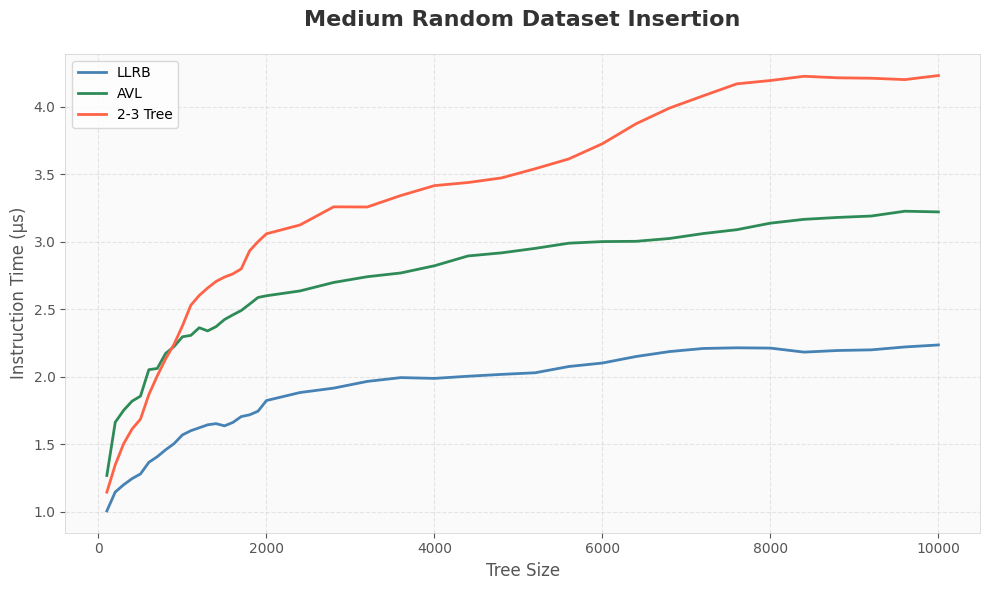

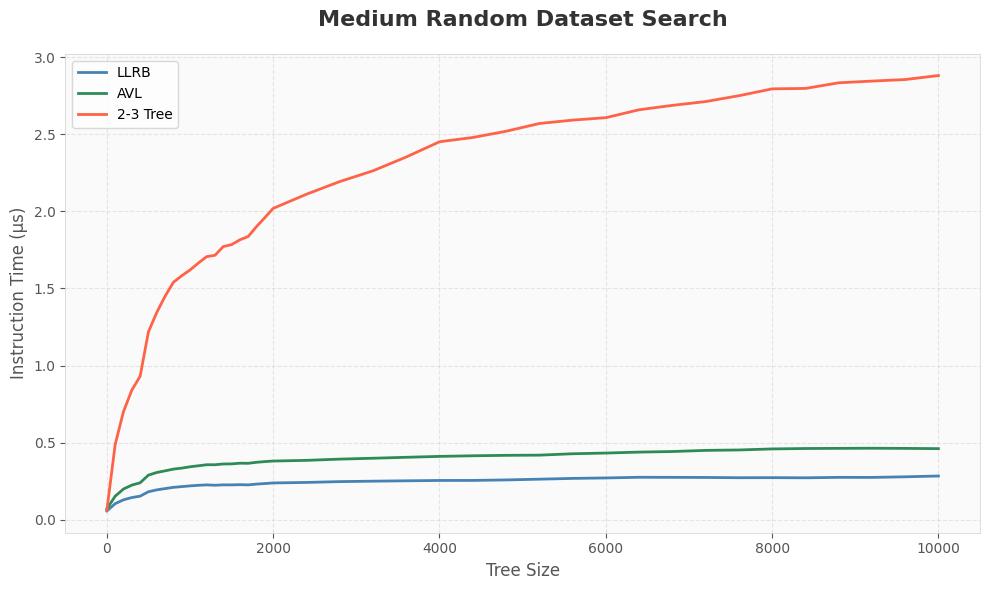

In [4080]:
title = """Medium Random Dataset"""
framework.evaluate_insertion(testGen.StringRandom())
framework.visualize(title + " Insertion")
framework.evaluate(testGen.StringRandom())
framework.visualize(title + " Search")

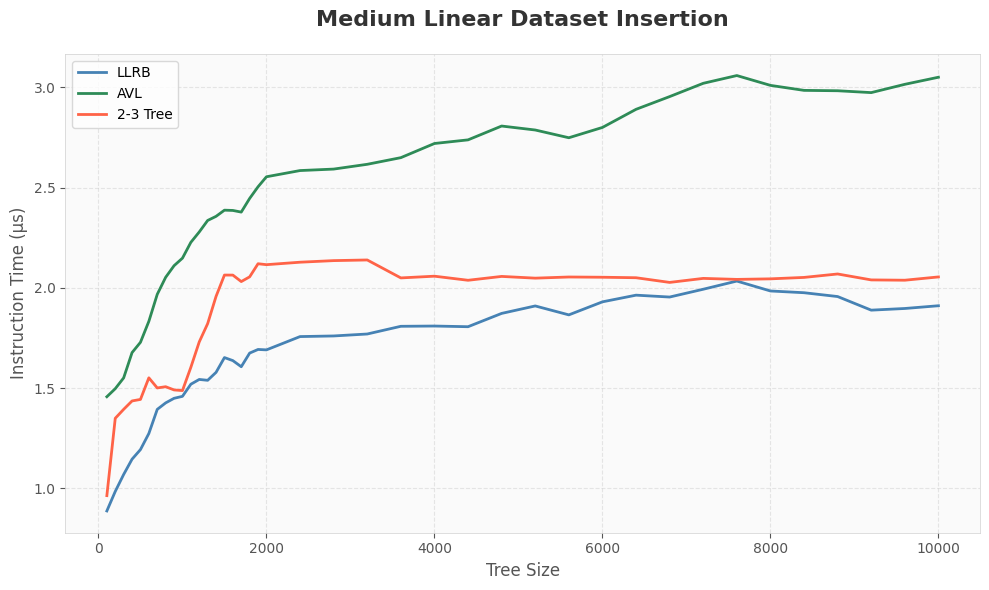

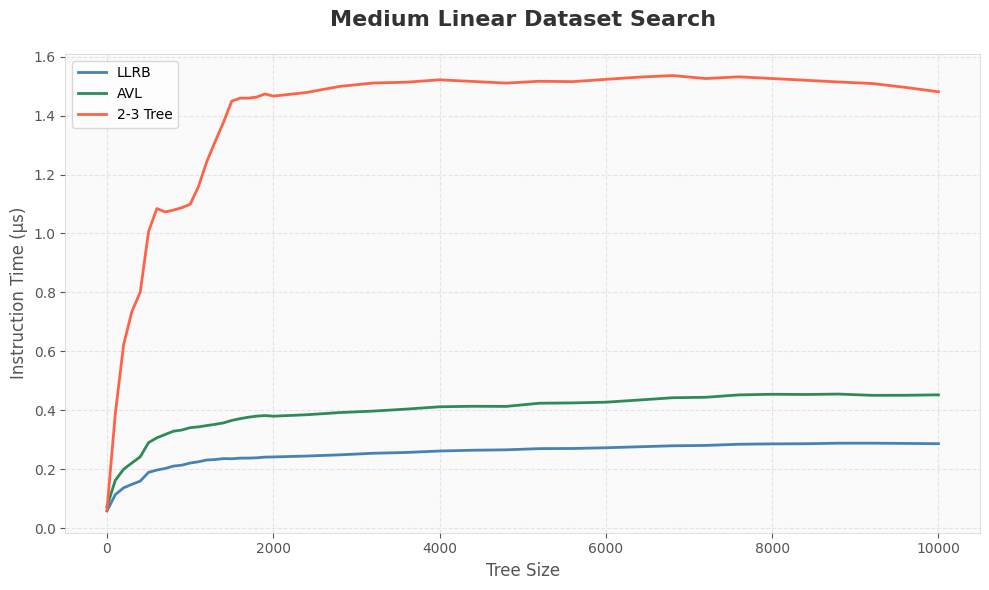

In [4081]:
title = """Medium Linear Dataset"""
framework.evaluate_insertion(testGen.IntegerLinear())
framework.visualize(title + " Insertion")
framework.evaluate(testGen.IntegerLinear())
framework.visualize(title + " Search")

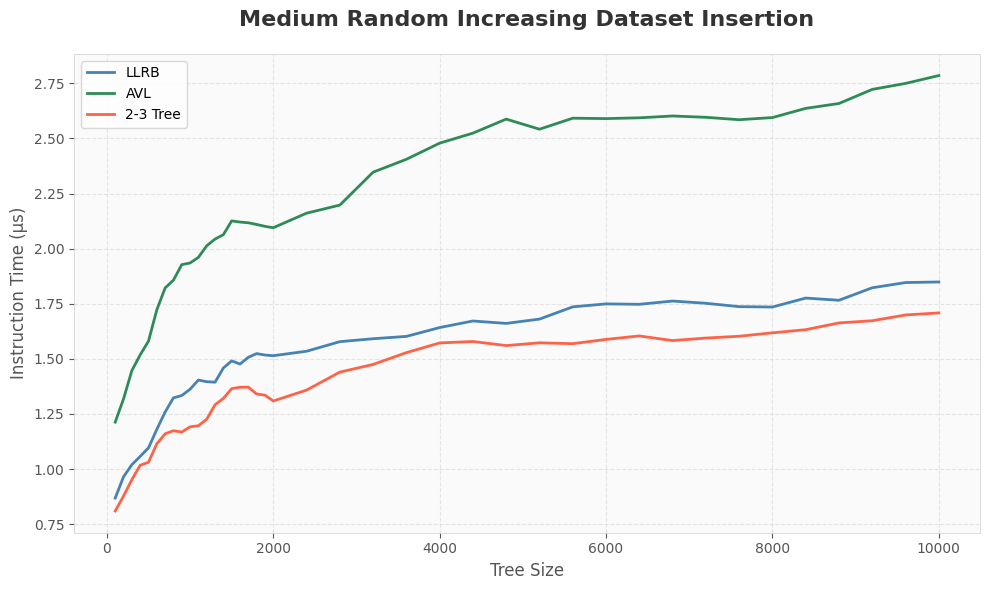

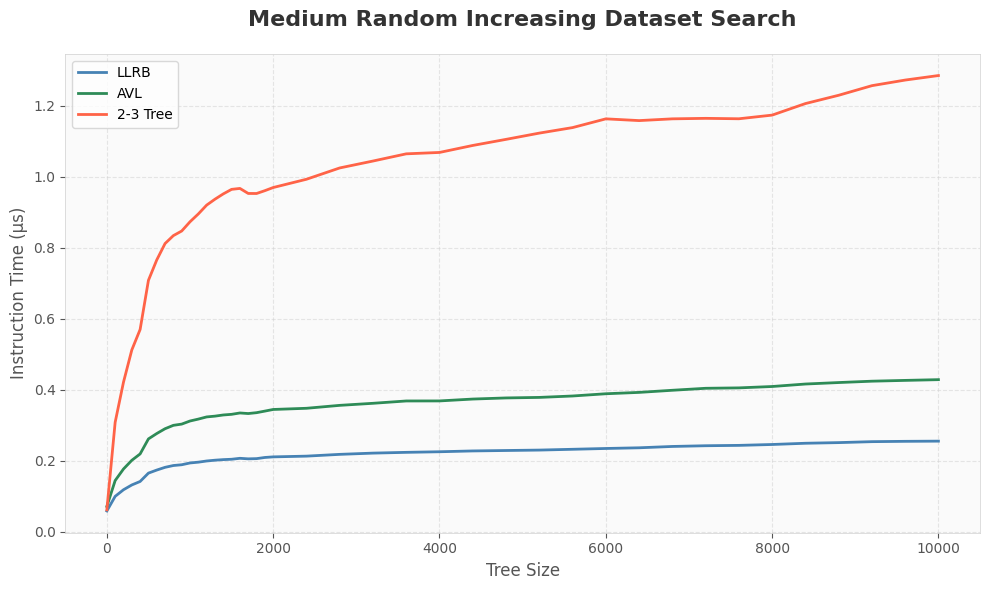

In [4082]:
title = """Medium Random Increasing Dataset"""
framework.evaluate_insertion(testGen.IntegerIncreasing())
framework.visualize(title + " Insertion")
framework.evaluate(testGen.IntegerIncreasing())
framework.visualize(title + " Search")